In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py 

In [2]:
fh5 = h5py.File('D:/zm/nodule_Texture.h5','r')
image_jj_gray = fh5['image_jj_gray']
image_jj_gray = np.array(image_jj_gray)
image_jj_gray = image_jj_gray.reshape(768, 64, 64, 1)
print(image_jj_gray.shape)
Texture = fh5['Texture']
Texture = np.array(Texture)

(768, 64, 64, 1)


In [20]:
from keras.utils import to_categorical
train_labels=to_categorical(Texture)
train_labels.shape

(768, 3)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(image_jj_gray,train_labels,test_size=0.2,random_state=1)

In [6]:
from keras import models
from keras import layers
from keras.models import Sequential,Input
from keras import optimizers
import keras
from keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization,Flatten,Dense,Lambda,Multiply,AveragePooling2D,Activation
from keras.models import Model

In [7]:
def Conv2d_BN(x, nb_filter,kernel_size, padding='valid',strides=(1,1),data_format='channels_last',dilation_rate=(1,1),
              activation='relu',name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
# inception 模块和 xception模块 bn层位置不一样

    #x = BatchNormalization(name=bn_name)(x)
    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,data_format='channels_last',activation='relu',
               dilation_rate=dilation_rate,name=conv_name)(x)
    x = BatchNormalization(name=bn_name)(x)
    
    return x

In [8]:
def TestNet(input_shape=None):
    inpt = Input(shape=input_shape)
    #padding = 'same'，填充为(步长-1）/2,还可以用ZeroPadding3D((3,3,3))
    x = BatchNormalization()(inpt)
    #x = Conv2d_BN(x,32,(1,1),strides=(1,1),padding='same',data_format='channels_last')
    x = Conv2d_BN(inpt,64,(3,3),strides=(1,1),padding='same',data_format='channels_last')
    x = MaxPooling2D(pool_size=(3,3),strides=(3,3),padding='same',data_format='channels_last')(x)
    x = Conv2d_BN(x,64,(3,3),strides=(1,1),padding='same',data_format='channels_last')
    x = MaxPooling2D(pool_size=(3,3),strides=(3,3),padding='same',data_format='channels_last')(x)
    x = Conv2d_BN(x,128,(3,3),strides=(1,1),padding='same',data_format='channels_last')
    x = MaxPooling2D(pool_size=(3,3),strides=(3,3),padding='same',data_format='channels_last')(x)
    x = Conv2d_BN(x,128,(3,3),strides=(1,1),padding='same',data_format='channels_last')
    x = AveragePooling2D(pool_size=(3,3),strides=(3,3),padding='same',data_format='channels_last')(x)
    
    #x = Conv2d_BN(x,64,(3,1), padding='valid',strides=(1,1),data_format='channels_last')
    #x = AveragePooling2D(pool_size=(9,1),strides=(9,1),padding='same',data_format='channels_last')(x)
    #x = Conv2d_BN(x,256,(1,3), padding='same',strides=(1,1),data_format='channels_last')
    #x = AveragePooling2D(pool_size=(1,2),strides=(1,2),padding='same',data_format='channels_last')(x)
    
    x = Flatten(data_format='channels_last')(x)
    x = Dense(128,activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(3,activation='softmax')(x)
    model = Model(inpt,x,name='inception')
    return model

In [9]:
model = TestNet(input_shape=(64,64,1))
model.summary()



Model: "inception"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        640       
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          

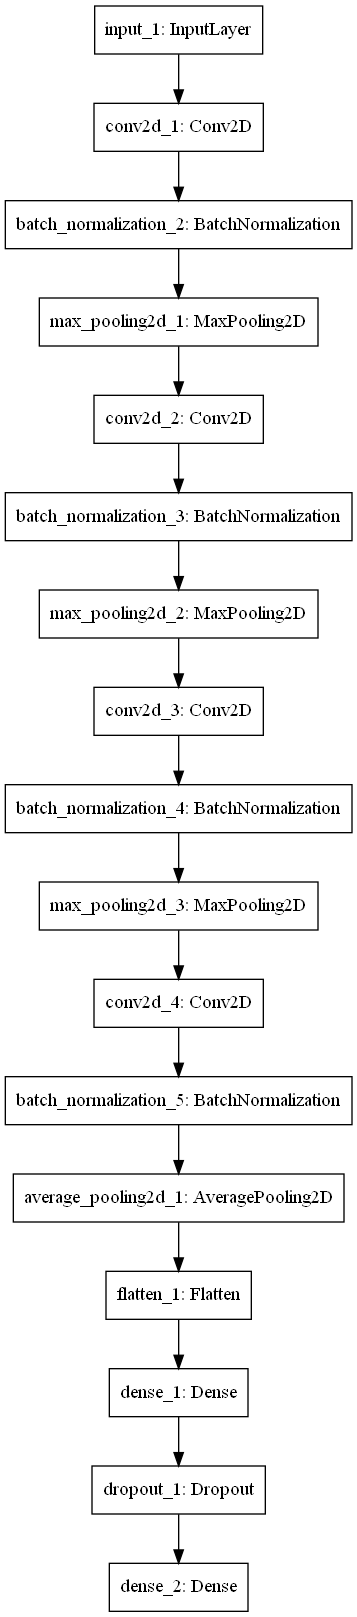

In [10]:
from tensorflow.keras.utils import plot_model     ##模型结构图
plot_model(model,'D:/机器学习实战/model_kaoshi1.png')

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),#
              metrics=['accuracy']
             )

In [12]:
his=model.fit(X_train,y_train,validation_split=0.25,epochs=50,batch_size=32)


Train on 460 samples, validate on 154 samples
Epoch 1/50
460/460 [==============================] - 6s 14ms/step - loss: 1.0081 - accuracy: 0.4696 - val_loss: 0.4626 - val_accuracy: 0.8896
Epoch 2/50
460/460 [==============================] - 7s 15ms/step - loss: 0.7488 - accuracy: 0.7522 - val_loss: 0.4797 - val_accuracy: 0.8896
Epoch 3/50
460/460 [==============================] - 8s 17ms/step - loss: 0.6435 - accuracy: 0.8304 - val_loss: 0.5017 - val_accuracy: 0.8896
Epoch 4/50
460/460 [==============================] - 8s 17ms/step - loss: 0.5690 - accuracy: 0.8587 - val_loss: 0.5110 - val_accuracy: 0.8896
Epoch 5/50
460/460 [==============================] - 7s 15ms/step - loss: 0.5157 - accuracy: 0.8609 - val_loss: 0.5145 - val_accuracy: 0.8896
Epoch 6/50
460/460 [==============================] - 7s 15ms/step - loss: 0.4837 - accuracy: 0.8804 - val_loss: 0.5356 - val_accuracy: 0.8896
Epoch 7/50
460/460 [==============================] - 8s 16ms/step - loss: 0.4596 - accuracy: 0

In [16]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print('test_acc:',test_acc)

154/154 [==============================] - 1s 4ms/step
test_acc: 0.8766233921051025


In [17]:
predict=model.predict(X_test)
predict=np.argmax(predict,axis=1)

In [18]:
label=np.argmax(y_test,axis=1)
from collections import Counter
Counter(label)

Counter({0: 9, 2: 136, 1: 9})

In [19]:
from sklearn.metrics import classification_report
print(classification_report(label,predict,target_names=None))

              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.00      0.00      0.00         9
           2       0.90      0.98      0.94       136

    accuracy                           0.88       154
   macro avg       0.63      0.40      0.43       154
weighted avg       0.85      0.88      0.85       154

